# Lab 3-4 데이터 전처리

## 라이브러리 import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=50)

## Standard Score를 사용한 데이터 전처리

### 평균값과 표준편차

In [6]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [14]:
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

### 새 생선 데이터의 표준 점수를 구함

In [9]:
new_fish = ([25,150] - mean) / std

#### 데이터 시각화

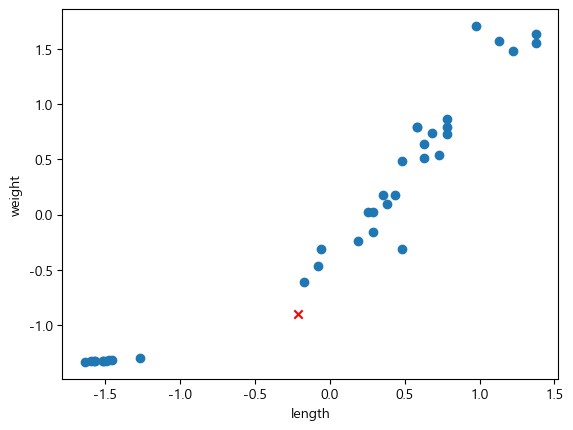

In [10]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_fish[0], new_fish[1], marker='x', color='red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 생성 후 학습/평가

In [16]:
kn = KNeighborsClassifier()

In [17]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [18]:
kn.score(test_scaled, test_target)

1.0

In [20]:
kn.predict([new_fish])

array([1.])

## 표준 점수 데이터 시각화

In [23]:
distances, indexes = kn.kneighbors([[new_fish[0], new_fish[1]]])

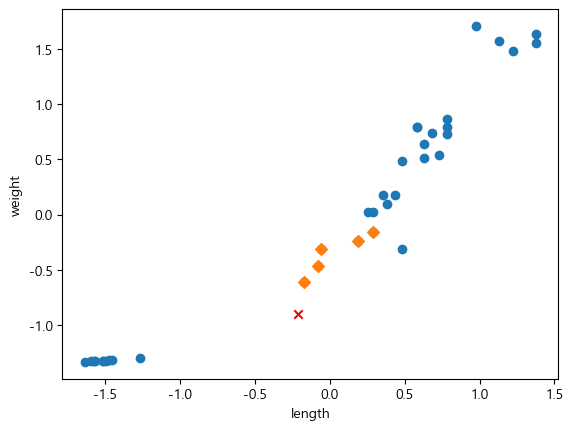

In [24]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new_fish[0], new_fish[1], marker='x', color='red')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

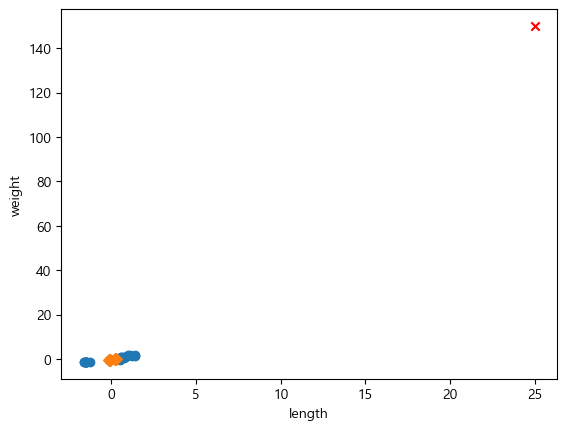

In [25]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='x', color='red')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()